In [1]:
import pandas as pd
import numpy as np
from pandas import Timestamp
import empyrical

In [2]:
from lumina.empyrical.gentic.pyplot_drawer import plot_his_profit

In [3]:
task_id = '200037'
name = 'tst4'

In [4]:
time_periods = {
    'train_time': (Timestamp('2022-07-25 09:31:00'), Timestamp('2024-05-29 13:22:00')),
    'val_time': (Timestamp('2024-05-29 13:23:00'), Timestamp('2024-12-05 10:15:00')),
    'test_time': (Timestamp('2024-12-05 10:16:00'), Timestamp('2025-03-13 15:00:00'))
}

In [5]:
def create_returns(names, task_id, mode='a_ret', key=None):
    res1 = []
    for name in names:
        if isinstance(key, str):
            temp = "temp/aicso2/{0}/returns/{1}/{2}.feather".format(
                str(task_id), key, name)
        else:
            temp = "temp/aicso2/{0}/returns/{1}.feather".format(
                str(task_id), name)
        cumulative_returns = pd.read_feather(temp).set_index(
            'trade_time')[mode]
        cumulative_returns.name = key + "_" + name
        res1.append(cumulative_returns)
    return pd.concat(res1, axis=1)

In [6]:
def create_empyrical(cumulative_returns, types=['all','train','val','test']):
    res = []
    for column in cumulative_returns.columns:
        dt = {'name': column}
        for tp in types:
            if tp == 'all':
                all_fitness = empyrical.sharpe_ratio(returns=cumulative_returns[column],
                                                  period=empyrical.DAILY)
                dt['all_sharpe'] = all_fitness
            if tp == 'train':
                train_fitness = empyrical.sharpe_ratio(returns=cumulative_returns.loc[time_periods['train_time'][0]:time_periods['train_time'][1]][column],
                                               period=empyrical.DAILY)
                dt['train_sharpe'] = train_fitness
            if tp == 'val':
                val_fitness = empyrical.sharpe_ratio(returns=cumulative_returns.loc[time_periods['val_time'][0]:time_periods['val_time'][1]][column],
                                               period=empyrical.DAILY)
                dt['val_sharpe'] = val_fitness
            if tp == 'test':
                test_fitness = empyrical.sharpe_ratio(returns=cumulative_returns.loc[time_periods['test_time'][0]:time_periods['test_time'][1]][column],
                                               period=empyrical.DAILY)
                dt['test_sharpe'] = test_fitness
        res.append(dt)
    return pd.DataFrame(res)

In [7]:
tst5_returns = create_returns(names=['equal_weight','train_fitness_weight','vol_inv_weight',
                                          'lasso','rigde'], task_id=task_id, key=name)
tst5_returns.head()

,tst4_equal_weight,tst4_train_fitness_weight,tst4_vol_inv_weight,tst4_lasso,tst4_rigde
trade_time,,,,,
2022-07-25,-0.002031,-0.002174,0.001292,-0.003004,-0.003003
2022-07-26,0.000322,-0.000205,-0.000494,-0.000599,-0.000602
2022-07-27,-0.000327,-0.001047,-0.003198,-0.005951,-0.005922
2022-07-28,-0.000501,-0.000236,0.000488,-0.003046,-0.003073
2022-07-29,-0.005769,-0.006239,-0.005020,-0.009410,-0.009410


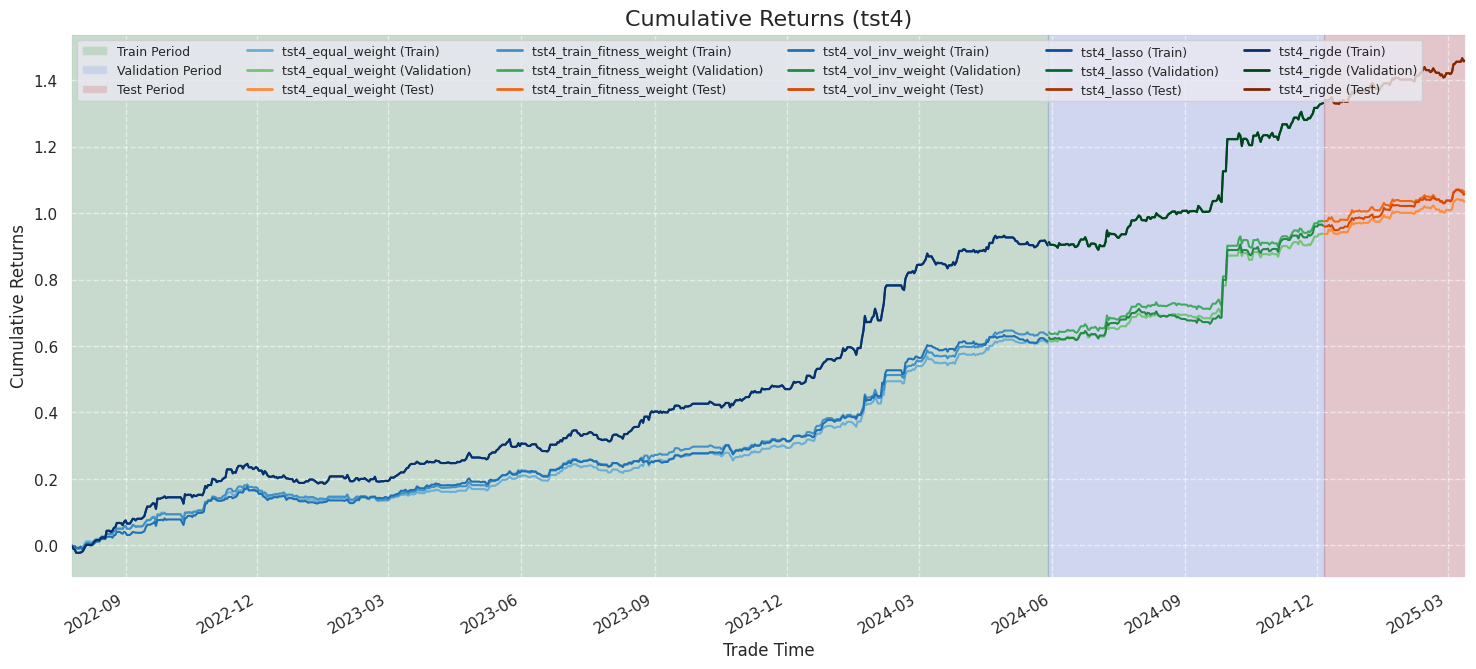

,name,all_sharpe,train_sharpe,val_sharpe,test_sharpe
0,tst4_equal_weight,2.735577,3.126815,2.620968,3.183393
1,tst4_train_fitness_weight,2.720614,3.168158,2.618280,2.939685
2,tst4_vol_inv_weight,2.555569,2.990269,2.446578,3.215194
3,tst4_lasso,2.973541,3.217095,2.862633,3.375988
4,tst4_rigde,2.974883,3.215845,2.866058,3.382111


In [8]:
plot_his_profit(cumulative_returns=tst5_returns.cumsum(), 
                time_periods=time_periods, name=name)
create_empyrical(tst5_returns)